In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['train', 'train.csv', 'sample_submission.csv', 'test']


In [4]:
# Importing the necessary dependencies

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm, tqdm_notebook
import cv2
import os
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense, Dropout, Activation, Conv2D, Flatten
from keras.callbacks import ModelCheckpoint


In [5]:
train_dir = "../input/train/train/"
test_dir = "../input/test/test/"
train_df = pd.read_csv('../input/train.csv')

In [6]:
# Linking the images as per the csv file, and using the pixels as features.
# This part is inspired from another kernel 'Keras _Transfer_VGG16' of the same competetion

features = []
target = []
images = train_df['id'].values
for img_id in tqdm_notebook(images):
    features.append(cv2.imread(train_dir + img_id))    
    target.append(train_df[train_df['id'] == img_id]['has_cactus'].values[0])  
features = np.asarray(features)
features = features.astype('float32')
features /= 255
target = np.asarray(target)

In [9]:
# Specifying the model

model = Sequential()
model.add(Conv2D(15, kernel_size=3, activation='relu', input_shape=(32,32,3), padding='same'))
model.add(Conv2D(15, kernel_size=3, activation='relu', padding='same'))
model.add(Conv2D(15, kernel_size=3, activation='relu', padding='same'))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

# Model Summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 15)        420       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 15)        2040      
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 32, 32, 15)        2040      
_________________________________________________________________
flatten_3 (Flatten)          (None, 15360)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 15361     
Total params: 19,861
Trainable params: 19,861
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Storing the optimal parameters
# This checkpoint object will store the model parameters in the file "weights.hdf5"
checkpoint = ModelCheckpoint('weights.hdf5', monitor='val_loss', save_best_only=True)
# Store in a list to be used during training
callbacks_list = [checkpoint]

Instructions for updating:
Use tf.cast instead.
Train on 14000 samples, validate on 3500 samples
Epoch 1/15
14000/14000 [==============================] - 5s 357us/step - loss: 0.2086 - acc: 0.9149 - val_loss: 0.1433 - val_acc: 0.9423
Epoch 2/15
14000/14000 [==============================] - 3s 193us/step - loss: 0.1032 - acc: 0.9611 - val_loss: 0.0773 - val_acc: 0.9760
Epoch 3/15
14000/14000 [==============================] - 3s 190us/step - loss: 0.0817 - acc: 0.9704 - val_loss: 0.0595 - val_acc: 0.9823
Epoch 4/15
14000/14000 [==============================] - 3s 185us/step - loss: 0.0645 - acc: 0.9774 - val_loss: 0.0563 - val_acc: 0.9811
Epoch 5/15
14000/14000 [==============================] - 3s 185us/step - loss: 0.0527 - acc: 0.9812 - val_loss: 0.0392 - val_acc: 0.9877
Epoch 6/15
14000/14000 [==============================] - 3s 186us/step - loss: 0.0496 - acc: 0.9831 - val_loss: 0.0402 - val_acc: 0.9886
Epoch 7/15
14000/14000 [==============================] - 3s 185us/step - l

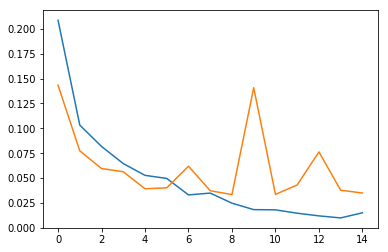

In [11]:
# Training the model
training = model.fit(features, target, validation_split=0.1, epochs=15, callbacks = callbacks_list)

# Visualizing the losses vs. epochs
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.show()

In [12]:
# Using the pixels of the test images as features

test_features = []
Test_images = []
for img_id in tqdm_notebook(os.listdir(test_dir)):
    test_features.append(cv2.imread(test_dir + img_id))     
    Test_images.append(img_id)
test_features = np.asarray(test_features)
test_features = test_features.astype('float32')
test_features /= 255

In [14]:
# Running the model over the test images

test_predictions = model.predict(test_features)
submissions = pd.DataFrame(test_predictions, columns=['has_cactus'])
submissions['has_cactus'] = submissions['has_cactus'].apply(lambda x: 1 if x > 0.75 else 0)
submissions['id'] = ''
cols = submissions.columns.tolist()
cols = cols[-1:] + cols[:-1]
submissions=submissions[cols]


In [15]:
for i, img in enumerate(Test_images):
    submissions.set_value(i,'id',img)


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


In [16]:
# Saving the output file

submissions.to_csv('submission.csv',index=False)
